In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

plt.style.use('fivethirtyeight')

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

이건 아직 import 안함. 나중에 필요할 때 import

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
datas = [train, test]

<h2> Data Pre - Processing </h2>

<h3> 데이터 구경1 </h3>


얘는 여기서 data 에 null 값이 있는지 없는지만 먼저 판단합니다.

일단 아직 "완전히 비어있는 값" 만 null 값으로 여기고 넘어갑니다.

아래에서는 한번 비어있는 값이 몇개나 있는지 개수를 알아보려고 출력해 보려고 하는 듯 합니다.

In [3]:
for data in datas :
    print(data.isnull().sum())
    print('------------------')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
------------------


표가 두 개 나왔는데 위에 있는 표는 train 데이터, 아래에 있는 표는 test 데이터

#there is null data in age, cabin, embarked


_____________________________________________________________


 <h2> 데이터 구경2 </h2>

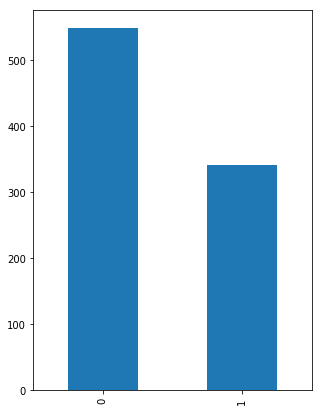

In [4]:
plt.figure(figsize = [5, 7])
train['Survived'].value_counts().plot.bar()

0은 사망, 1은 생존이므로 엄청 많이 죽었다는 것을 알 수 있음.

그리고 여기서 꽤나 유용한 메소드 value_count()

_there are more people who didnt survived_

_this competition is predict 'survived'. so, we focus on survived columns._

_Sex vs Survived_

_Pclass vs Survived_ <br>
_PCclass : Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd_


_Age vs Survived_ <br>

_SipSp vs Survived_ <br>
_SipSp : # of siblings / spouses aboard the Titanic_

_Parch vs Survived_ <br>
_Parch : # of parents / children aboard the Titanic_


In [5]:
#이제 seaborn 이라는 라이브러리를 import 할 건데 이 라이브러리는 countplot 을 그리는데 사용되었음.
#pyplot에서는 잘 지원을 하지 않아가지고..

import seaborn as sns

<h1> Data Visuallization </h1>
    
<h2> Seaborn Lib </h2>

<h3> What is Seaborn? </h3>

Seaborn: Python's Statistical Data Visualization Library
One of the best but also more challenging ways to get your insights across is to visualize them: that way, you can more easily identify patterns, grasp difficult concepts or draw the attention to key elements. When you’re using Python for data science, you’ll most probably will have already used Matplotlib, a 2D plotting library that allows you to create publication-quality figures. Another complimentary package that is based on this data visualization library is Seaborn, which provides a high-level interface to draw statistical graphics. <br>
위 내용 출처 : Seaborn home page

<h3> Seaborn vs Matplotlib </h3>

The seaborn package was developed based on the Matplotlib library. It is used to create more attractive and informative statistical graphics. While seaborn is a different package, it can also be used to develop the attractiveness of matplotlib graphics. While matplotlib is great, we always want to do better. <br>
위 내용 출처 : https://www.kdnuggets.com/2019/04/data-visualization-python-matplotlib-seaborn.html <br>


<h4> 한번 해봤다가 안됨 </h4>

figure_set = plt.figure(figsize = [15,20])
cnt = 1
for index in train.columns :
    axbycnt = figure_set.add_subplot(4, 3, cnt) 
    print(index)
    if (index != 'Name') and (index !='PassengerId') and (index != 'Ticket') and (index != 'Cabin') and (index != 'Ticket') and (index != 'Age') :
        sns.countplot(index, hue = 'Survived', data = train, ax = axbycnt)
    cnt+=1

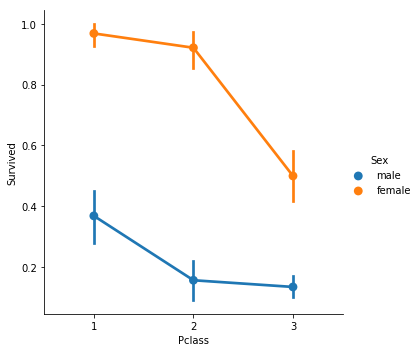

In [6]:
#커널에는 factorplot 이라는 이름으로 소개되었는데, 함수가 아예 패치가 되면서 사라져버림. 이런 경우도 있다 싶음. 
#그런데 아무리 찾아봐도 여기서 저 쪼그만한 막대가 뭘 의미하는지는 잘 모르겠음
sns.catplot('Pclass', 'Survived', hue='Sex', data=train, kind = 'point')

To see more catplot examples, https://cmdlinetips.com/2019/03/catplot-in-seaborn-python/ <br>
(Kor) https://datascienceschool.net/view-notebook/4c2d5ff1caab4b21a708cc662137bc65/

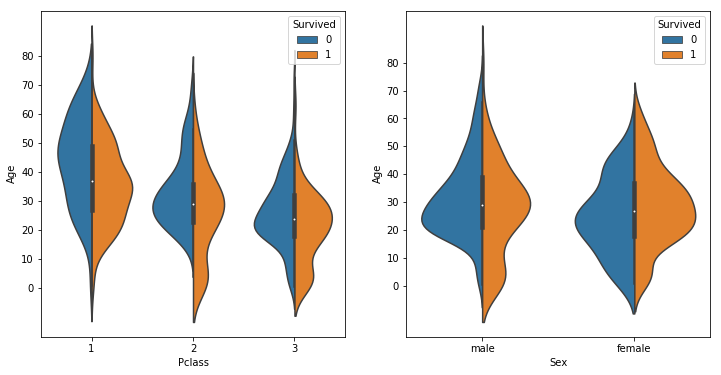

In [7]:
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.violinplot('Pclass', 'Age', hue='Survived', data=train, split=True, ax=ax[0])
ax[0].set_yticks(range(0,90,10))

sns.violinplot('Sex', 'Age', hue='Survived', data=train, split=True, ax=ax[1])
ax[1].set_yticks(range(0, 90, 10))

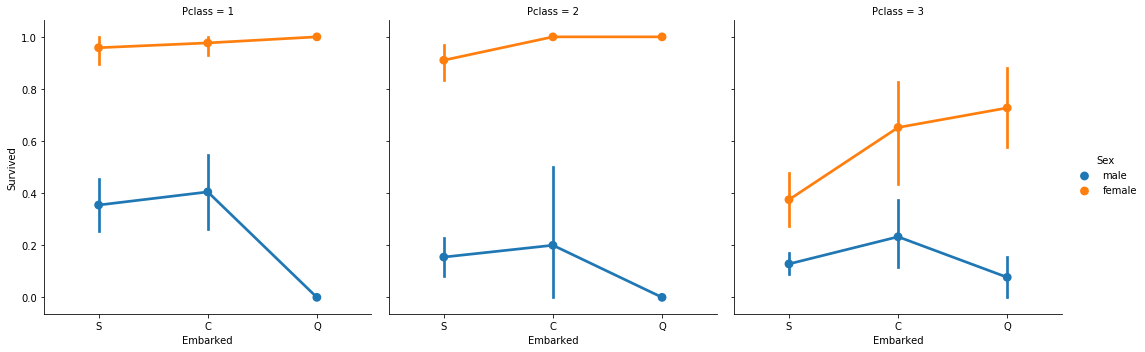

In [8]:
sns.catplot('Embarked', 'Survived', hue='Sex', col='Pclass', data=train, kind = 'point')

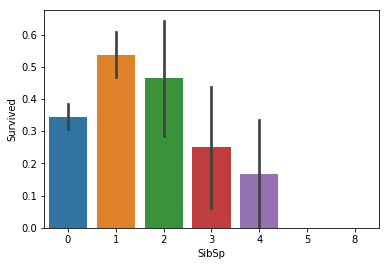

In [9]:
sns.barplot('SibSp', 'Survived', data=train)

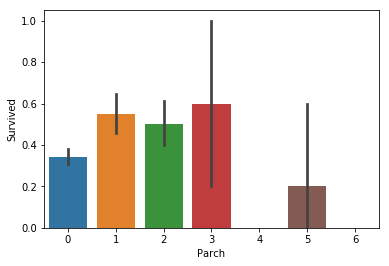

In [10]:
sns.barplot('Parch', 'Survived', data=train)

we simply looked at the data

now, lets fill the null data and analysis the data, make model

<h1>Fill the NaN</h1>

In [11]:
del train, test, datas

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
passenger = test['PassengerId']
datas = [train, test]

extract the initials of the name.<br>
이름의 이니셜을 추출합니다.

because of fill the nan value in 'Age' column.<br>
왜냐하면 Age 열에 있는 데이터를 fill 해주기 위해서

<h3> AGE nan filling </h3>

In [12]:
for data in datas: ##datas 에는 train 데이터와 test 데이터 둘 모두가 들어 있는데, 둘 다 데이터를 셋팅해주어야 해서 이렇게 쓴듯.
    data['Initial'] = 0
    data['Initial'] = data['Name'].str.extract('([A-Za-z]+)\.')
    #dataframe 형태로 저장된 data['Name'] 을 string 형으로 변환시켜 주는 것은 
    #stirng 기반의 여러 유용한 메소드를 사용하기 위해서
    
    #extract() 는 인자로  Regular expression pattern 가 들어가는데
    #이 Regep (REGular Expression Pattern)을 찾는 문법이 있는듯. 근데 그게 찾아봐도 뭔지잘 모르겠으니 생략.
    
    
    
    #이름의 initial 을 알면, 대략적인 AGE나 Gender 등을 알 수 있기 때문에 이 짓을 하고 있는듯함.
    
    print(data['Initial'])

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
5          Mr
6          Mr
7      Master
8         Mrs
9         Mrs
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15        Mrs
16     Master
17         Mr
18        Mrs
19        Mrs
20         Mr
21         Mr
22       Miss
23         Mr
24       Miss
25        Mrs
26         Mr
27         Mr
28       Miss
29         Mr
        ...  
861        Mr
862       Mrs
863      Miss
864        Mr
865       Mrs
866      Miss
867        Mr
868        Mr
869    Master
870        Mr
871       Mrs
872        Mr
873        Mr
874       Mrs
875      Miss
876        Mr
877        Mr
878        Mr
879       Mrs
880       Mrs
881        Mr
882      Miss
883        Mr
884        Mr
885       Mrs
886       Rev
887      Miss
888      Miss
889        Mr
890        Mr
Name: Initial, Length: 891, dtype: object
0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
5          Mr
6        Miss
7     

위에 Series 가 두 개 보일텐데, 윗놈은 train set 에 있는 애들의 호칭, 아랫놈은 test set 에 있는 애들의 호칭을 의미함

test set 까지 훑어보는 이유가 뭔지는 잘 모르겠음.

In [13]:
train['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

위에 unique method 가 사용되었는데, 이 메소드는 찾아보니 많은 기능이 있지만

그 중 하나는 그냥 중복되는 것 다 제하고 하나씩만 보여주는 것인듯. 

pandas.series.unique()

In [14]:
for data in datas:
    data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Other'],inplace=True)
    #replace method
    
    #인자 Inplace = True 는 , return 값을 그냥 자기 자신에 바로 저장하는 인자인 것 같음.
    

data['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [15]:
train.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

여기서 또 유용한 method groupby()

fill nan value in age focus on Initial



In [16]:
for data in datas:
    data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Mr'), 'Age'] = 33
    data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Master'), 'Age'] = 5
    data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Mrs'), 'Age'] = 36
    data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Miss'), 'Age'] = 22
    data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Other'), 'Age'] = 46

In [17]:
print(datas[0]['Age'].isnull().sum())
print(datas[1]['Age'].isnull().sum())
print(datas[0]['Initial'].unique())
print(datas[1]['Initial'].unique())

#null 은 총 몇 개인지 한번 더 확인하는 것,


0
0
['Mr' 'Mrs' 'Miss' 'Master' 'Other']
['Mr' 'Mrs' 'Miss' 'Master' 'Other']


<h3> "Embarked" nan Filling </h3>

most of Embarked is 'S'. so fill the nan value in 'Embakred' by 'S'

첨언하자면, Column 의 개수를 세는 것에는 여러 가지 방법이 있음.
1. df = pd.DataFrame({'a':list('abssbab')}) <br>
    df.groupby('a').count() <br><br>
2. df['a'].value_counts()


In [18]:
for data in datas: 
    #print(data['Embarked'].unique())
    print(data['Embarked'].value_counts())
    print(data['Embarked'])

S    644
C    168
Q     77
Name: Embarked, dtype: int64
0      S
1      C
2      S
3      S
4      S
5      Q
6      S
7      S
8      S
9      C
10     S
11     S
12     S
13     S
14     S
15     S
16     Q
17     S
18     S
19     C
20     S
21     S
22     Q
23     S
24     S
25     S
26     C
27     S
28     Q
29     S
      ..
861    S
862    S
863    S
864    S
865    S
866    C
867    S
868    S
869    S
870    S
871    S
872    S
873    S
874    C
875    C
876    S
877    S
878    S
879    C
880    S
881    S
882    S
883    S
884    S
885    Q
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object
S    270
C    102
Q     46
Name: Embarked, dtype: int64
0      Q
1      S
2      Q
3      S
4      S
5      S
6      Q
7      S
8      C
9      S
10     S
11     S
12     S
13     S
14     S
15     C
16     Q
17     C
18     S
19     C
20     C
21     S
22     S
23     C
24     C
25     S
26     C
27     C
28     S
29     C
      ..
388    Q
389    S

In [19]:
for data in datas:
    data['Embarked'].fillna('S', inplace=True)

In [20]:
#혹시 null 이 남아있나 한번 더 점검.

print(datas[0]['Embarked'].isnull().sum())
print(datas[1]['Embarked'].isnull().sum())

0
0


<h3> handling "Fare Size" </h3>


Fare size to log scale beacause is too large

In [21]:
#사실 왜 섣부르게 로그스케일로 만들어버리는지는 잘 모르겠는데
#일단 따라가보도록 함.

for data in datas:
    data['Fare'] = data["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
    
    
    #람다가 뭔지는 잘 모르겠음.

age to categorical


numerical data 를 categorical data 로 만들겠다는 이야기같은데, 왜 이런짓을 하는지는 아직 잘 모르겠음.


In [22]:
for data in datas:
    data['Age_band']=0  
    #새로운 column 을 만들고, 그 이름을 Age_band 라고 함. 뭐하는 column 인지는 아직 모름
   
    data.loc[data['Age']<=16,'Age_band']=0
    #data[ 행(row) : 나이가 16세 이하. 열(column) : 'Age_band' ] 에 0을 대입한다.
    #즉, 다시 말하면, 나이가 16세 이하라면 age_band 에 0을 넣는다는 이야기임.
    #아래 네 줄도 같은 맥락인데, 왜 이렇게 나이기준을 [16 32 48 64 ] 이런식으로 잡은지는 잘 모르겠음.
    
    data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
    data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
    data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
    data.loc[data['Age']>64,'Age_band']=4

make family_size


가족의 size 도 카테고리컬로 만들어주려고 하는것 같음. <br>
이렇게 보니까 전부 모르는 것 투성이 같은데, 문제는 자기도 왜 이렇게 하는지 잘 모르고 그냥 막 하는 중인듯

In [23]:
for data in datas:
    data['Family_Size']=0
    #새로운 column 을 만들고, 그 이름을 Family_Size 라고 함.

    data['Family_Size']=data['Parch']+data['SibSp']
    #이 family size 라는 column 은, parch (부모님이 몇명인지) + sibsp (자식이 몇명인지) 를 합친 값을 가진 column 임
    
    data['Alone']=0
    #'Alone' 이라는 새로운 Column 을 또 만들고, 그것을 0으로 초기화시킴.
    
    data.loc[data.Family_Size==0,'Alone']=1
    #'Alone' 이것도 결국 categorical data 인데, 만약 Family_size 가 0이면, 혼자 사는거니까 1의 데이터를 넣어줌.


and make categorical columns <br>
카테고리컬 열을 더 만들어주겠다고 함

In [24]:
for data in datas:
    data['Sex'].replace(['male','female'],[0,1],inplace=True)
    #male 을 0으로, female 을 1로 표시하도록 바꾸는 것임. inplace = True 지?
    #그냥 문자데이터를 숫자로 바꾸는 것 그 이상도 이하도 의미가 없는 것
    
    
    data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
    #이것도 비슷한 맥락임.
    
    data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)
    #이것도 비슷한 맥락임.

하면서 계속 이상한데.. 그냥 아무 의미 없이 하는 과정은 없어야하는데

도대체 이걸 왜 하고 있는건지 잘 모르고 하고 있는것같아서 좀 마음이 아팠음


그렇다면 잠깐 왜 이렇게  categorical data 에 집착하는지 알 필요가 .


굳이 이미 category 인것을 다시 분류해넣을 필요가 있을까? 차원 축소도 아니고.

<h2> Why we make "Categorical Data" </h2>

다시 커널에 나온 대로 진행을 해 보자.


<h1> Dimension Reduction </h1>

drop unnecessary columns


In [25]:
for data in datas:
    data.drop(['Name','Age','Ticket','Cabin','PassengerId'],axis=1,inplace=True)
    
    
    ##이미 categorical data 로 전환되었기 때문에 이걸 남겨둘 필요가 없었던 것

In [26]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Initial', 'Age_band', 'Family_Size', 'Alone'],
      dtype='object')

In [27]:
test.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Initial',
       'Age_band', 'Family_Size', 'Alone'],
      dtype='object')

In [28]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Initial,Age_band,Family_Size,Alone
0,0,3,0,1,0,1.981001,0,0,1,1,0
1,1,1,1,1,0,4.266662,1,1,2,1,0
2,1,3,1,0,0,2.070022,0,2,1,0,1
3,1,1,1,1,0,3.972177,0,1,2,1,0
4,0,3,0,0,0,2.085672,0,0,2,0,1


<h1> Make a model and Fit </h1>

In [29]:
X=train[train.columns[1:]]
Y=train['Survived']

In [30]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV


kfold = StratifiedKFold(n_splits=10)

<h2> What is sklearn? </h2>

Scikit-learn Scikit-learn contains a number of state-of-the-art machine learning algorithms, as well as comprehensive documentation about
each algorithm. Scikit-learn is a very popular tool, and the most prominent Python library for machine learning. It is widely used in industry and academia.<br>
pf. Song 데이터분석개론 中




<h3> What is RandomForestClassifier </h3>

_from sklearn.ensemble import RandomForestClassifier_

to learn Random Forest Classfier, we have to learn Regression Trree <br>
To learn Regression Tree, https://youtu.be/xki7zQDf74I and https://youtu.be/2Rd4AqmLjfU <br>

의사결정 트리는, 데이터가 균일해지도록 분할하는 일을 하는데, 예측과 분류에 따라 그 의미가 조금 다르다 <br>
_예측_은 비슷한 수치를 가지고 있는 관측치끼리 모으는 것 <br>
_분류_는 비슷한 범주를 가지고 있는 관측치끼리 모으는 것.




<h3> AdaBoostClassifier </h3>

_from sklearn.ensemble import AdaBoostClassifier_



learn adaboost : https://www.youtube.com/watch?v=LsK-xG1cLYA <br>

Adaboost is used to combine with Descision tree.<br>

Random Forest <--> Adaboost
각 나무들의 투표로 결과 산출 <--> 각 stump 들의 투표로 결과 산출 <br>
각 나무들의 size가 제각각 <--> 각 나무들의 size가 단일함 <br>
각 나무들이 독립적 <--> 각 stump들이 서로 영향을 미침 <br>



<h3> What is Straitified K Fold? </h3>
<br>
straitified : 계층화된 <br>

<h4> What is K - Fold </h4>
<h5> Summary </h5> <br>
To learn K - Fold Cross Validation : https://youtu.be/fSytzGwwBVw <br>
Cross validation allows us to compare different machine learning methods and get a sense of how well they will work in practice.<br>
우리는 Training Set와 Test Set 로 나누는데, 그런데 그 Test Set 를 10분할해서 1개를 Validation Set 로 만든다면, 10 Fold 가 되는 것.<br>
Training Set 를 자동으로 K분할한 세트를 만들어줄 수 있도록 도와주는 것이 KFold.<br>

How can K-folk cross -validation be used to search for an optimal tuning parameter? <br>
Learn more : https://youtu.be/Gol_qOgRqfA<br>

<h4> Then, Why we must "Stratify"? </h4>

What is Stratify Selection? to learn more : https://youtu.be/sYRUYJYOpG0 <br>
<br>
계층화된 선택이란, 모집단의 특성을 잘 드러낼 수 있는 표본집단을 추출하는 것이다.<br>
예를 들어, 모집단이 남자 100 : 여자 80 으로 구성되어 있다면, 18명의 표본집단을 추출할 때 남자10, 여자8 로 추출하는 것이다. 그런데 왜 이런 선택을 했는지는 아직 나도 잘 모르겠다.<br>



<h3> What is Ensemble </h3><br>

앙상블은 하나만 만드는게아니고 여러가지 해서 투표하는 방식을 의미함.


<h3> What is GridSearch </h3> <br>

그리드서치는 어떤 매개변수가 적절한지 자동으로 검색해 준다.
Learn more : https://blog.naver.com/sanghan1990/221124929129


<h3>Perfomance Evaluation</h3>

<h4>AdaBoostClassifier</h4>

In [31]:
np.where(np.isnan(X))

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
kfold = StratifiedKFold(n_splits=10)
decisionTree = DecisionTreeClassifier()

ada = AdaBoostClassifier(decisionTree, random_state=0)

## 그리드 서치
ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2,3],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

decision_grid = GridSearchCV(ada, param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

decision_grid.fit(X,Y)

ada_best = decision_grid.best_estimator_
decision_grid.best_score_

<h4> RandomForestClassifier </h4>

In [75]:
rf = RandomForestClassifier()


## 그리드 서치
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True],
              "n_estimators" :[95, 100, 105]
              }

<h3> TRY1 : bootstrap setting </h3>
rf_param_grid = {<br>
"max_depth": [None], <br>
              "max_features": [1, 3, 10], <br>
              "min_samples_split": [2, 3, 10], <br>
              "min_samples_leaf": [1, 3, 10], <br>
              "bootstrap": [False],<br>
              "n_estimators" :[100,300, 500, 700, 800, 900]<br>
              }<br>
다른거 다 가만히 두고 bootstrap = False 로 하니까 랭킹 쭉올라감 (0.79425)<br>
암, 역시 random forest 의 기본은 bootstrap 이지... ㅡ.ㅡ <br>


<h3> TRY2 : n_estimators setting </h3>
rf_param_grid = {<br>
"max_depth": [None], <br>
              "max_features": [1, 3, 10], <br>
              "min_samples_split": [2, 3, 10], <br>
              "min_samples_leaf": [1, 3, 10], <br>
              "bootstrap": [False],<br>
              "n_estimators" :[100]<br>
              }<br>
아무리 생각해도 나무를 900개나 쳐 만들 필요가 있을까 싶음<br>
그래서 100개만 해 봤더니 랭킹이 또 올라감 (0.79904)<br>
아무래도 900개를 돌렸을때는 overfitting 이 됐던 것인지 잘 모르겠음.<br>


<h3> TRY3 : n_estimators setting(2) </h3>
rf_param_grid = {<br>
"max_depth": [None], <br>
              "max_features": [1, 3, 10], <br>
              "min_samples_split": [2, 3, 10], <br>
              "min_samples_leaf": [1, 3, 10], <br>
              "bootstrap": [False],<br>
              "n_estimators" :[20, 30, 50, 100, 110, 120]<br>
              }<br>
아무리 생각해도 나무를 900개나 쳐 만들 필요가 있을까 싶음2<br>
그래서 20, 30, 50만 이용해서 돌려 봤을때는 정확도가 약간 내려갔고 (0.78947)<br>
혹시나 올렸을때는 정확도가 올라갈까 싶어 올려 봤는데 뭐 똑같이 내려갔음 (0.77511)<br>
결국 100이 가장 최적이었거나<br>
그런데 애초에 Test 데이터셋 자체가 500 rows 밖에 안돼서 10개~20개의 오차는 별 의미 없다고 생각함<br>


min_samples_split 이랑 min_samples_leaf 는 통계적으로 무슨 의미가 있는지 나도 모르니까 건들지 않겠음. <br>

#max_depth :: 
    #The maximum depth of the tree. 
    #나무의 깊이를 설정합니다.
    
    #If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. 
    #만약 None 값으로 놓으면, 노드는 언제까지 확장되냐면 
    1. 모든 "leaf node"들이 "pure"할때 (즉, leaf node 는 무조건 Survived 또는 Not-Survived 둘 중 하나의 값이 들어갈 때까지 확장) 또는 
    2. 모든 "leaf node"들이 "min_samples_split" 보다 적은 값을 가지게 될 때까지 확장된답니다!
    
#min_samples_split : 
    #The minimum number of samples required to split an internal node:
    #internal node 를 나눌 것으로 요구되는 최소 데이터셋(samples)의 숫자입니다. 즉, 이 숫자보다 개수가 높으면 나눈다는 것.
    #internal node 는 tree 자료구조에서도 사용되는데, "하나 이상의 자식을 가지는 노드" 맞죠?
        #If int, then consider min_samples_split as the minimum number.
        #If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.
    
    
#min_samples_leaf : 
    #The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
    #"leaf node" 에 요구되는 최소 데이터셋(sample) 갯수입니다. 즉, 이 숫자보다 개수가 높으면 나눈다는 것.
    #좌우 가지에(이진트리의 경우) 최소 개수를 남기는지 안 남기는지. 어느 깊이에서나 나누어지는 포인트는 오직 저 기준으로 고려됩니다. 회귀분석의 경우, 이것은 모델을 상당히 유하게 만들어 줍니다.
        #If int, then consider min_samples_split as the minimum number.
        #If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.
#bootstrap : 이걸 왜 False 로 한 건지 모르겠음. Random Forest 에서 Bootstrap 은 기본 아닌가?
    #Whether bootstrap samples are used when building trees. If False, the whole datset is used to build each tree.
    #bootstrap samples 를 사용할 건지 결정합니다. False 로 설정하면 모든 데이터셋이 각 트리에 사용된다고 해요.
    
#n_estimators : 분류기 개수. 이자식 variable 은 10개밖에 없는데, 나무를 900개나 쳐 만듦

In [76]:
rf_grid = GridSearchCV(rf, param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
#grid search CV 만의 객체가 있나봄. GridSearch는 뭐 하나의 알고리즘인듯?


#  n_jobs : int or None, optional (default=None)
#  Number of jobs to run in parallel. None means 1 unless in a joblib.parallel_backend context. 
#  -1 means using all processors. See Glossary for more details.



rf_grid.fit(X,Y)
#gridSearch CV 에서 반환된 객체에서 fit 메소드를 불러오면, 우리가 저장해두었던 k개의 fold 를 싸그리 다 해보고 평균낸거 
#알아서 Random Forest 수행하고 가장 좋은모델 찾아와주는 어마어마한것.

rf_best = rf_grid.best_estimator_
rf_grid.best_score_

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    9.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   22.4s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   45.2s
[Parallel(n_jobs=4)]: Done 810 out of 810 | elapsed:   46.2s finished


0.8451178451178452

In [77]:
pred = rf_best.predict(test)
submission = pd.DataFrame({
    'PassengerId' : passenger,
    'Survived' : pred
})
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
#from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, learning_curve


In [78]:
import os
submission.to_csv('submission.csv', index=False)